# European Social Survey

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import boxcox
from scipy.stats import wilcoxon
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
import seaborn as sns

%matplotlib inline

### Functions

In [2]:
def compare_independently(df, category, metric, mapper):
    grouped = df.groupby(category)
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    i = 0
    category_list = []
    for cat, group in grouped:
        sns.distplot(group[metric], ax=ax[i], bins=10)
        ax[i].title.set_text(f'{mapper[cat]}')
        i += 1
        category_list.append(group[metric].tolist())
    plt.show()
    list_lengths = [len(x) for x in category_list]
    min_length = np.min(list_lengths)
    category_list = [x[:min_length-1] for x in category_list]
    t, p = ttest_ind(category_list[0], category_list[1])
    print(grouped[category, metric].mean().T)
    print('Independent T-Test:')
    print(f' * t = {t:0.3f}')
    if p > 0.0009:
        print(f' * p = {p:0.3f}')
    else:
        print(f' * p = {p:0.3e}')

In [3]:
def compare_dependently(df, category, metric, cat_map, year_map):
    for cat in df[category].unique():
        grouped = df.loc[df[category]==cat, ['year', metric]].groupby('year')
        fig, ax = plt.subplots(1, 2, figsize=(10, 4))
        i = 0
        metric_list = []
        for year, group in grouped:
            sns.distplot(group[metric], ax=ax[i], bins=10)
            ax[i].title.set_text(f'{cat_map[cat]} - {year_map[year]}')
            i += 1
            metric_list.append(group[metric].tolist())
        plt.show()
        list_lengths = [len(x) for x in metric_list]
        min_length = np.min(list_lengths)
        metric_list = [x[:min_length-1] for x in metric_list]
        w, p = wilcoxon(metric_list[0], metric_list[1])
        print(df.loc[df[category]==cat, ['year', metric]].groupby('year').mean().T)
        print('Wilcoxon Test:')
        print(f' * w = {w:0.3f}')
        print(f' * p = {p:0.3f}')

### Mappers

In [4]:
country_map = {
    'CH': 'Switzerland',
    'CZ': 'Czech Republic',
    'DE': 'Germany',
    'ES': 'Spain',
    'NO': 'Norway',
    'SE': 'Sweden'
}

In [5]:
year_map = {
    6: 2012,
    7: 2014
}

In [6]:
partner_map = {
    1.0: 'Has Partner',
    2.0: 'No Partner'
}

In [7]:
gender_map = {
    1.0: 'Male',
    2.0: 'Female'
}

## Load Dataset
Load the data into a Pandas `DataFrame`.

In [8]:
df = pd.read_csv('./data/ESSdata_Thinkful.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8594 entries, 0 to 8593
Data columns (total 13 columns):
cntry      8594 non-null object
idno       8594 non-null float64
year       8594 non-null int64
tvtot      8586 non-null float64
ppltrst    8580 non-null float64
pplfair    8555 non-null float64
pplhlp     8569 non-null float64
happy      8563 non-null float64
sclmeet    8579 non-null float64
sclact     8500 non-null float64
gndr       8584 non-null float64
agea       8355 non-null float64
partner    8577 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 873.0+ KB


## Analysis
### 1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

In [10]:
columns = ['idno', 'cntry', 'year', 'ppltrst']
df_trust = df.loc[:, columns].copy()

In [11]:
df_trust.dropna(inplace=True)

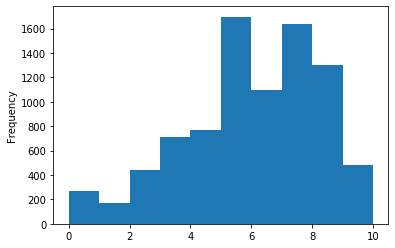

In [12]:
df_trust['ppltrst'].plot.hist(bins=10)
plt.show()

In [13]:
df_trust['ppltrst_log'] = np.log(df_trust['ppltrst'] + 1)

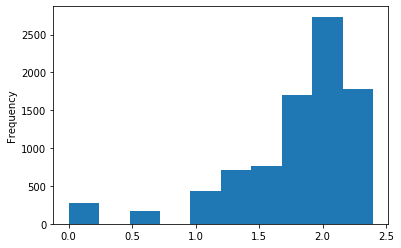

In [14]:
df_trust['ppltrst_log'].plot.hist(bins=10)
plt.show()

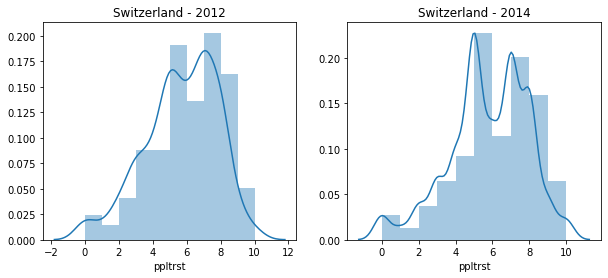

year            6         7
ppltrst  5.677878  5.751617
Wilcoxon Test:
 * w = 106278.500
 * p = 0.441


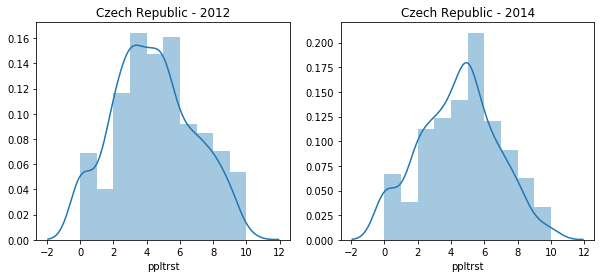

year            6         7
ppltrst  4.362519  4.424658
Wilcoxon Test:
 * w = 80544.000
 * p = 0.522


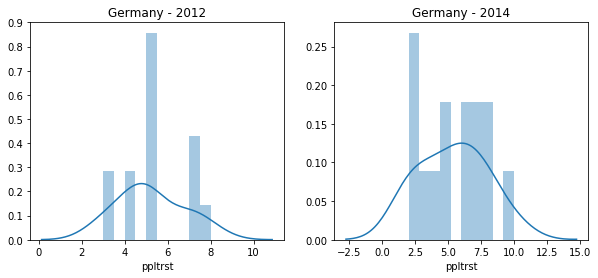

year            6         7
ppltrst  5.214286  5.357143
Wilcoxon Test:
 * w = 33.000
 * p = 0.635


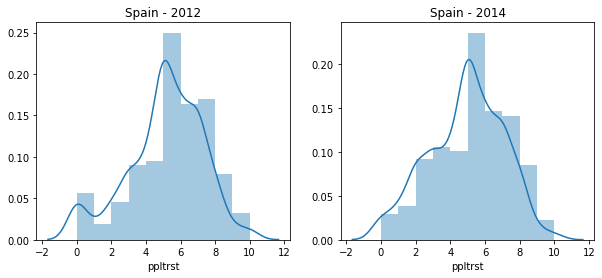

year            6         7
ppltrst  5.114592  4.895128
Wilcoxon Test:
 * w = 237134.000
 * p = 0.004


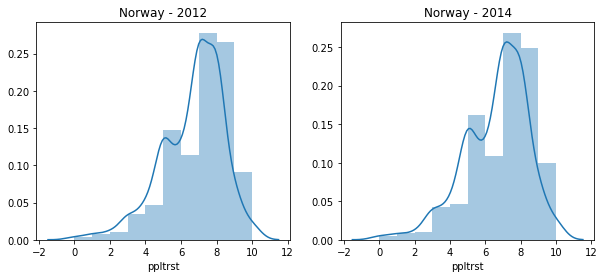

year            6        7
ppltrst  6.649315  6.59863
Wilcoxon Test:
 * w = 88058.000
 * p = 0.722


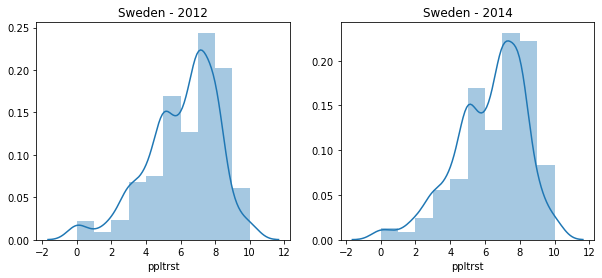

year            6         7
ppltrst  6.058499  6.257709
Wilcoxon Test:
 * w = 132682.000
 * p = 0.031


In [15]:
compare_dependently(df_trust, 'cntry', 'ppltrst', country_map, year_map)

**Observations:** The large p-values for most countries indicate there is no change in trust between 2012 and 2014. The only exception is Spain, which has a p-value of 0.004. Trust degraded in Spain.

### Did people become happier from 2012 to 2014? Compute results for each country in the sample.

In [16]:
columns = ['idno', 'cntry', 'year', 'happy']
df_happy = df.loc[:, columns].copy()

In [17]:
df_happy.dropna(inplace=True)

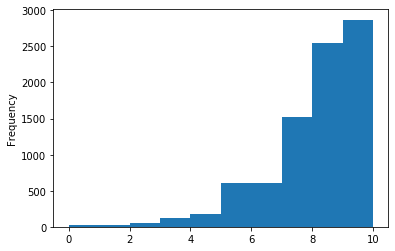

In [18]:
df_happy['happy'].plot.hist(bins=10)
plt.show()

In [19]:
min_value = df_happy['happy'].min()
offset = np.min([0, min_value])
boxcox_transform, max_log = boxcox(df_happy['happy'] - offset + 1)
df_happy['happy_bc'] = boxcox_transform

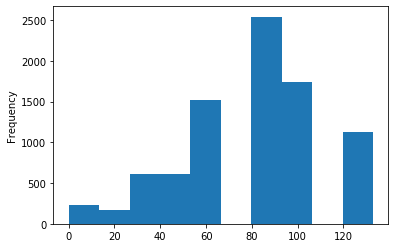

In [20]:
df_happy['happy_bc'].plot.hist(bins=10)
plt.show()

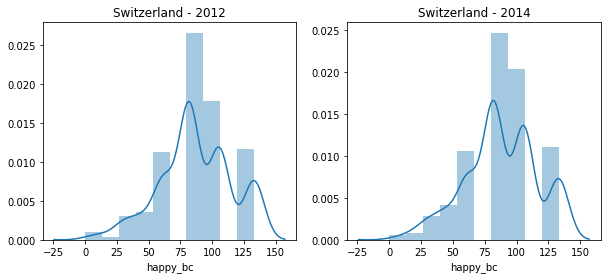

year              6          7
happy_bc  87.246584  87.739405
Wilcoxon Test:
 * w = 88677.500
 * p = 0.891


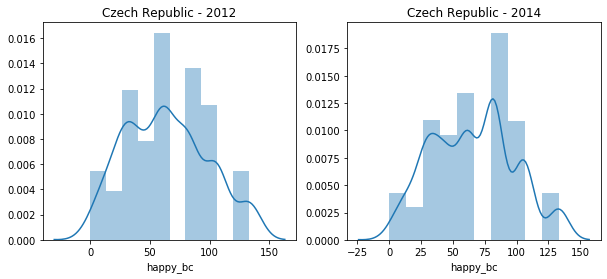

year              6          7
happy_bc  63.987544  65.689777
Wilcoxon Test:
 * w = 72470.500
 * p = 0.305


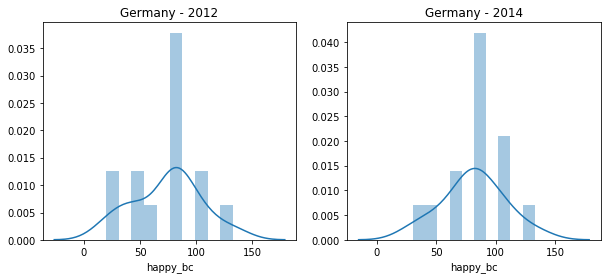

year              6          7
happy_bc  73.983389  81.342517
Wilcoxon Test:
 * w = 18.500
 * p = 0.359


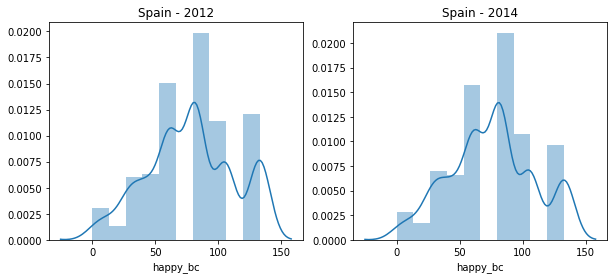

year              6          7
happy_bc  78.173065  75.295731
Wilcoxon Test:
 * w = 228456.000
 * p = 0.033


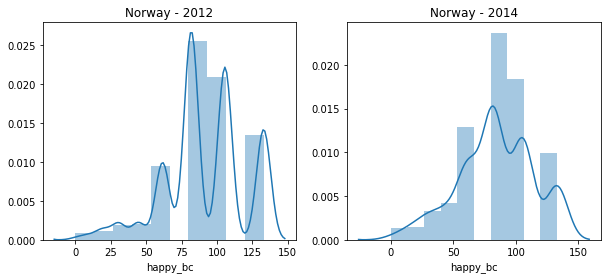

year              6          7
happy_bc  90.892073  84.103596
Wilcoxon Test:
 * w = 64613.500
 * p = 0.000


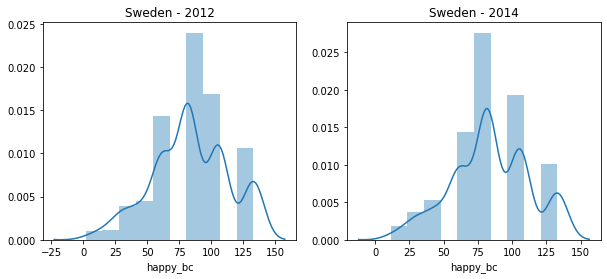

year              6          7
happy_bc  83.669574  83.996288
Wilcoxon Test:
 * w = 126079.000
 * p = 0.730


In [21]:
compare_dependently(df_happy, 'cntry', 'happy_bc', country_map, year_map)

**Observations:** All countries, except Norway, showed no change in happiness levels. In Norway, there was a slight, but significant, decrease in happiness, as indcated by the small p-value.

### Who reported watching more TV in 2012, men or women?

In [22]:
columns = ['idno', 'tvtot', 'gndr']
df_tv = df.loc[df['year'] == 6, columns].copy()

In [23]:
df_tv.dropna(inplace=True)

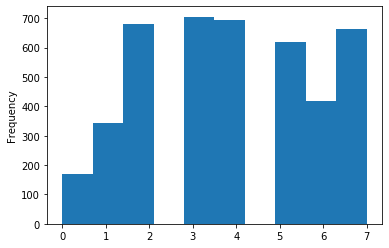

In [24]:
df_tv['tvtot'].plot.hist(bins=10)
plt.show()

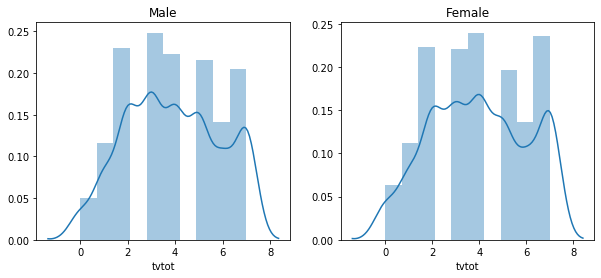

gndr        1.0       2.0
gndr   1.000000  2.000000
tvtot  3.901906  3.944393
Independent T-Test:
 * t = -0.614
 * p = 0.539


In [25]:
compare_independently(df_tv, 'gndr', 'tvtot', gender_map)

**Observations:** The large p-value for the independent t-test indicates that there is no difference in the amount of TV watched between men and women.

### 4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

In [26]:
columns = ['idno', 'pplfair', 'partner']
df_fair = df.loc[df['year'] == 6, columns].copy()

In [27]:
df_fair.dropna(inplace=True)

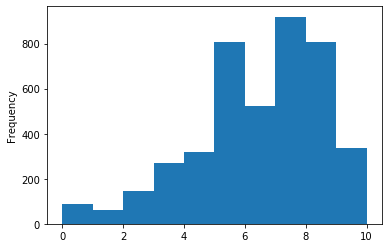

In [28]:
df_fair['pplfair'].plot.hist(bins=10)
plt.show()

In [29]:
min_value = df_fair['pplfair'].min()
offset = np.min([0, min_value])
boxcox_transform, max_log = boxcox(df_fair['pplfair'] - offset + 1)
df_fair['pplfair_bc'] = boxcox_transform

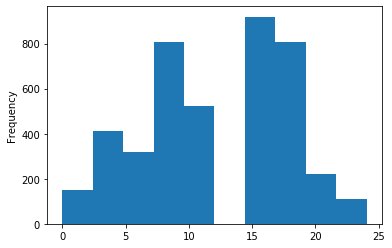

In [30]:
df_fair['pplfair_bc'].plot.hist(bins=10)
plt.show()

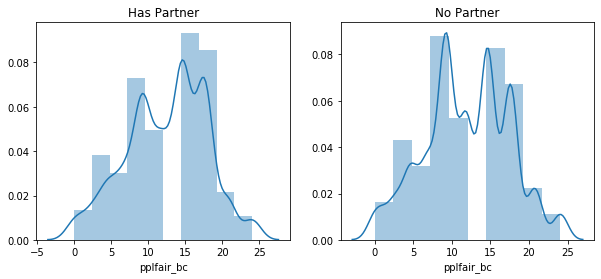

partner           1.0       2.0
partner      1.000000   2.00000
pplfair_bc  12.516122  11.93896
Independent T-Test:
 * t = -3.050
 * p = 0.002


In [31]:
compare_independently(df_fair, 'partner', 'pplfair_bc', partner_map)

**Observations:** The small p-value for the independent t-test indicates that people with out a partner think people are less fair.

### 5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [32]:
columns = ['idno', 'sclmeet', 'cntry']
df_social = df.loc[df['year'] == 7, columns].copy()

In [33]:
df_social.dropna(inplace=True)

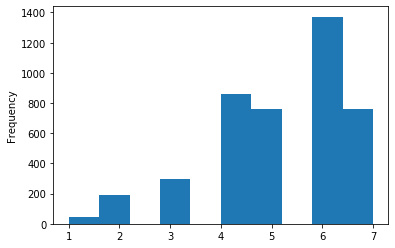

In [34]:
df_social['sclmeet'].plot.hist(bins=10)
plt.show()

In [35]:
min_value = df_social['sclmeet'].min()
offset = np.min([0, min_value])
boxcox_transform, max_log = boxcox(df_social['sclmeet'] - offset + 1)
df_social['sclmeet_bc'] = boxcox_transform

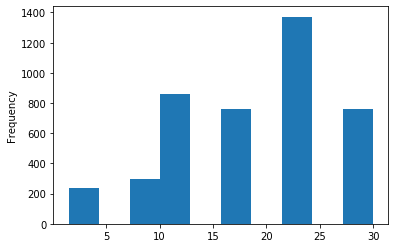

In [36]:
df_social['sclmeet_bc'].plot.hist(bins=10)
plt.show()

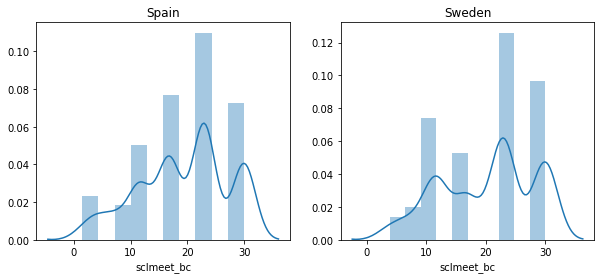

cntry              ES         SE
sclmeet_bc  19.287992  20.158015
Independent T-Test:
 * t = -2.130
 * p = 0.033


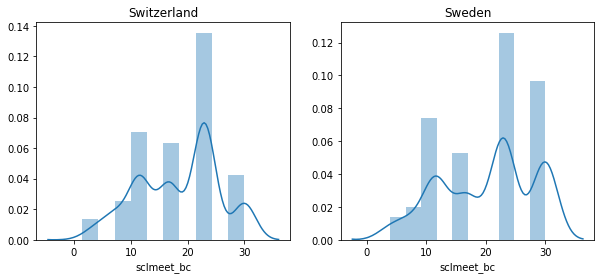

cntry             CH         SE
sclmeet_bc  18.50022  20.158015
Independent T-Test:
 * t = -3.108
 * p = 0.002


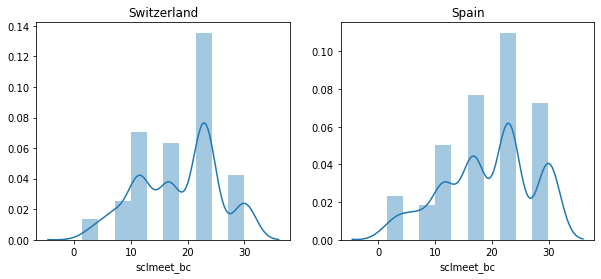

cntry             CH         ES
sclmeet_bc  18.50022  19.287992
Independent T-Test:
 * t = -2.598
 * p = 0.009


In [37]:
countries_list = ['SE', 'ES', 'CH']
country_pairs = []
for i in range(len(countries_list)-1):
    country_pairs.append(countries_list[i])
    for j in range(i+1, len(countries_list)):
        country_pairs.append(countries_list[j])
        sub_df = df_social[df_social['cntry'].isin(country_pairs)].copy()
        compare_independently(sub_df, 'cntry', 'sclmeet_bc', country_map)
        country_pairs.pop()
    country_pairs = []

**Observations:** 
* People in Sweden are slightly more social than people in Spain.
* People in Sweden are more social than people in Switzerland.
* People in Spain are more social than people in Switzerland.

### Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [38]:
columns = ['idno', 'sclact', 'cntry']
df_active = df.loc[df['year'] == 7, columns].copy()

In [39]:
df_active.dropna(inplace=True)

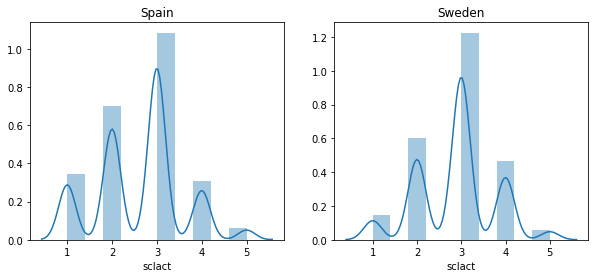

cntry         ES        SE
sclact  2.616878  2.879425
Independent T-Test:
 * t = -7.000
 * p = 3.608e-12


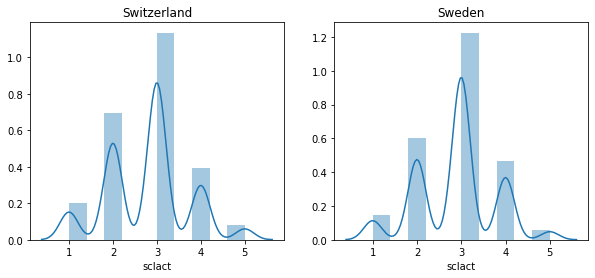

cntry         CH        SE
sclact  2.781699  2.879425
Independent T-Test:
 * t = -2.242
 * p = 0.025


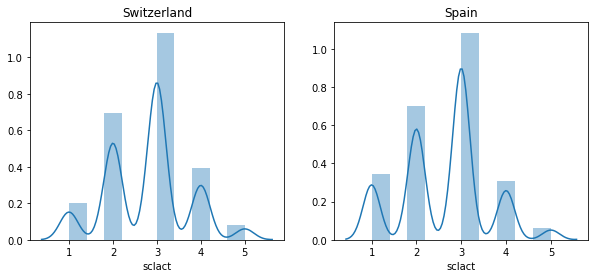

cntry         CH        ES
sclact  2.781699  2.616878
Independent T-Test:
 * t = 3.729
 * p = 1.995e-04


In [40]:
countries_list = ['SE', 'ES', 'CH']
country_pairs = []
for i in range(len(countries_list)-1):
    country_pairs.append(countries_list[i])
    for j in range(i+1, len(countries_list)):
        country_pairs.append(countries_list[j])
        sub_df = df_active[df_active['cntry'].isin(country_pairs)].copy()
        compare_independently(sub_df, 'cntry', 'sclact', country_map)
        country_pairs.pop()
    country_pairs = []

**Observations:**
* People in Sweeden participate more in social activities than people in Spain.
* People in Sweeden and Switzerland participate about the same amount in social activities.
* People in Switzerland participate more in social activities than people in Spain.